In [2]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.5 MB/s eta 0:00:00


In [4]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=151565 sha256=731cd6c86f2b058b075da3908a507364aba509b8a8e71257b960deffea98ac22
  Stored in directory: /Users/liusq/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
df_item = pd.read_csv("olist_order_items_dataset.csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")
df_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("olist_order_payments_dataset.csv")
df_customers = pd.read_csv("olist_customers_dataset.csv")
#df_category = pd.read_csv("product_category_name_translation.csv")


In [11]:
df_train = df_orders.merge(df_item, on='order_id', how='left')
df_train = df_train.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(df_reviews, on='order_id', how='outer')
df_train = df_train.merge(df_products, on='product_id', how='outer')
df_train = df_train.merge(df_customers, on='customer_id', how='outer')
df_train = df_train.merge(df_sellers, on='seller_id', how='outer')

print(df_train.shape)

(119143, 39)


In [15]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [16]:
resumetable(df_train)

Dataset Shape: (119143, 39)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,16.46
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,16.46
2,order_status,object,0,8,delivered,delivered,delivered,0.25
3,order_purchase_timestamp,object,0,88789,10/2/17 10:56,10/2/17 10:56,10/2/17 10:56,16.23
4,order_approved_at,object,0,50463,10/2/17 11:07,10/2/17 11:07,10/2/17 11:07,15.04
5,order_delivered_carrier_date,object,0,61545,10/4/17 19:55,10/4/17 19:55,10/4/17 19:55,15.41
6,order_delivered_customer_date,object,0,75650,10/10/17 21:25,10/10/17 21:25,10/10/17 21:25,15.69
7,order_estimated_delivery_date,object,0,459,10/18/17 00:00,10/18/17 00:00,10/18/17 00:00,8.47
8,order_item_id,float64,833,21,1.0,1.0,1.0,0.72
9,product_id,object,833,32951,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,13.63


In [20]:
import pandas as pd

# Function to summarize the dataframes
def summarize_df(df, dataset_name):
    # Calculate the summary statistics
    n_rows = df.shape[0]
    n_cols = df.shape[1]
    null_amount = df.isnull().sum().sum()
    qty_null_columns = df.isnull().any().sum()
    null_columns = df.columns[df.isnull().any()].tolist()
    return {
        'dataset': dataset_name,
        'n_rows': n_rows,
        'n_cols': n_cols,
        'null_amount': null_amount,
        'qty_null_columns': qty_null_columns,
        'null_columns': null_columns
    }

# Load the datasets as specified
df_item = pd.read_csv("olist_order_items_dataset.csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")
df_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("olist_order_payments_dataset.csv")
df_customers = pd.read_csv("olist_customers_dataset.csv")

# Create a list of tuples with dataframe and its name
dataframes = [
    (df_item, 'olist_order_items_dataset'),
    (df_reviews, 'olist_order_reviews_dataset'),
    (df_orders, 'olist_orders_dataset'),
    (df_products, 'olist_products_dataset'),
    (df_geolocation, 'olist_geolocation_dataset'),
    (df_sellers, 'olist_sellers_dataset'),
    (df_order_pay, 'olist_order_payments_dataset'),
    (df_customers, 'olist_customers_dataset')
]

# Generate the summary for each dataframe
summary = [summarize_df(df, name) for df, name in dataframes]

# Convert the summary into a DataFrame
summary_df = pd.DataFrame(summary)
summary_df 

,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,olist_order_items_dataset,112650,7,0,0,[]
1,olist_order_reviews_dataset,99224,7,0,0,[]
2,olist_orders_dataset,99441,8,0,0,[]
3,olist_products_dataset,32951,9,623,1,[product_category_name]
4,olist_geolocation_dataset,19177,6,0,0,[]
5,olist_sellers_dataset,3095,4,0,0,[]
6,olist_order_payments_dataset,103886,5,0,0,[]
7,olist_customers_dataset,99441,5,0,0,[]


/var/folders/mn/vttw2j4j2ms2nsl9nv11043c0000gp/T/ipykernel_58857/4044034327.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/mn/vttw2j4j2ms2nsl9nv11043c0000gp/T/ipykernel_58857/4044034327.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




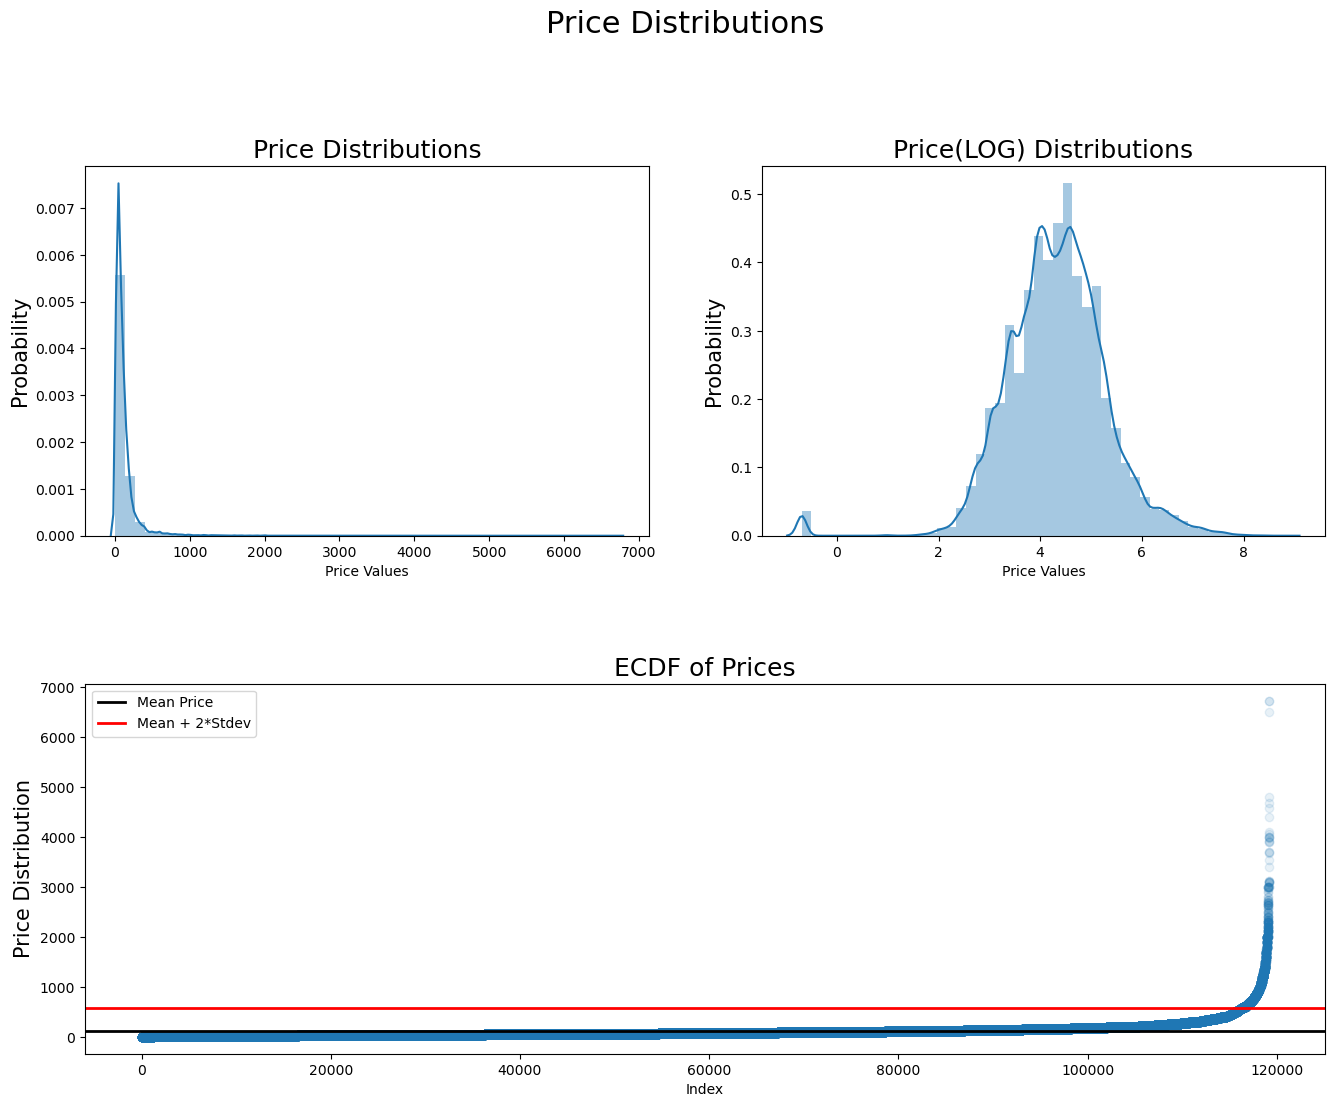

In [21]:
df_train['price'].fillna(-1, inplace=True)

plt.figure(figsize=(16,12))
plt.suptitle('Price Distributions', fontsize=22)
plt.subplot(221)
g = sns.distplot(df_train['price'])
g.set_title("Price Distributions", fontsize=18)
g.set_xlabel("Price Values")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(df_train['price']+1.5))
g1.set_title("Price(LOG) Distributions", fontsize=18)
g1.set_xlabel("Price Values")
g1.set_ylabel("Probability", fontsize=15)

plt.subplot(212)
g4 = plt.scatter(range(df_train.shape[0]),
                 np.sort(df_train['price'].values), 
                 alpha=.1)
g4= plt.title("ECDF of Prices", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Price Distribution", fontsize=15)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean(), color='black', 
           label='Mean Price', linewidth=2)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean() + (2.5*df_train[df_train['price'] != -1]['price'].std()),
                 color='red', 
           label='Mean + 2*Stdev', linewidth=2)
g4 = plt.legend()

plt.subplots_adjust(hspace = 0.4, top = 0.85)

plt.show()


In [ ]:
'''
It gives to us a clearly vision about the price distributions and now we now that.
Mean Value is: 120.65
Standard Deviation is: 184.11.
In the graph, I set as outliers all product prices that cross the bound of Mean(120.65) + 2.5x the Stdev(184.11).
The bound to define outliers is BRL 580.92

'''

In [24]:
df_train['price_log'] = np.log(df_train['price'] + 1.5)

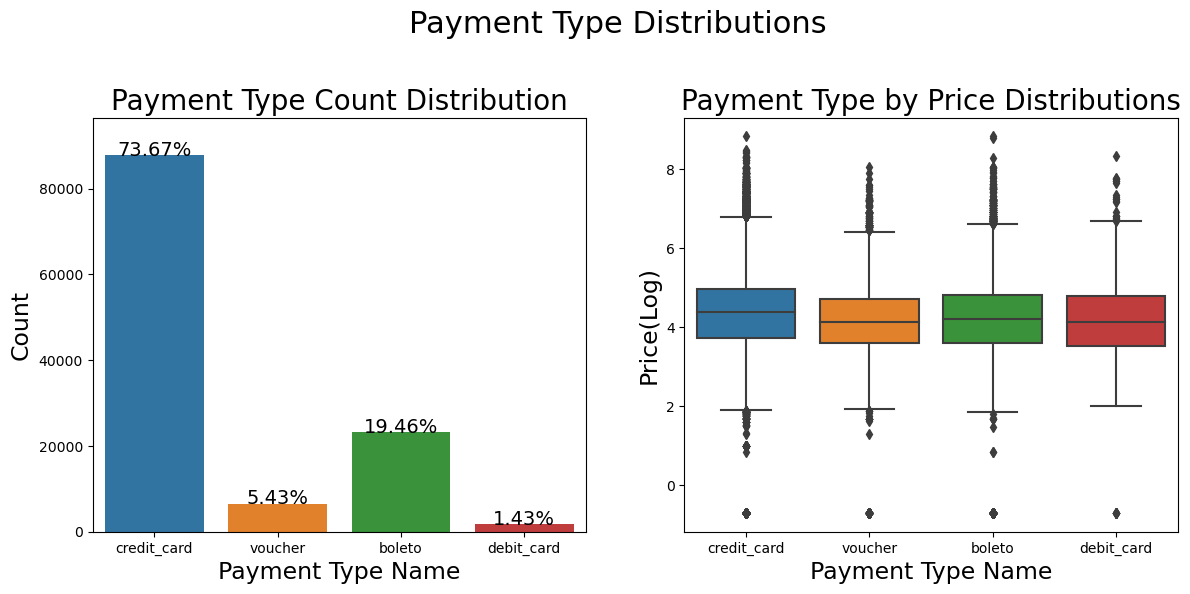

In [25]:
total = len(df_train)

plt.figure(figsize=(14,6))

plt.suptitle('Payment Type Distributions', fontsize=22)

plt.subplot(121)
g = sns.countplot(x='payment_type', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type Count Distribution", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.1)
plt.subplot(122)
g = sns.boxplot(x='payment_type', y='price_log', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type by Price Distributions", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Price(Log)", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.8)

plt.show()

In [ ]:
'''
More than 73.5% of all sales are the Payment type is Credit Card.
Second most common Payment Type is "boleto"(invoice) with almost 19.5%.
The third more common payment type is voucher with 5.43%.
We also have some payments from debit card and only 3 sales to not_defined
'''

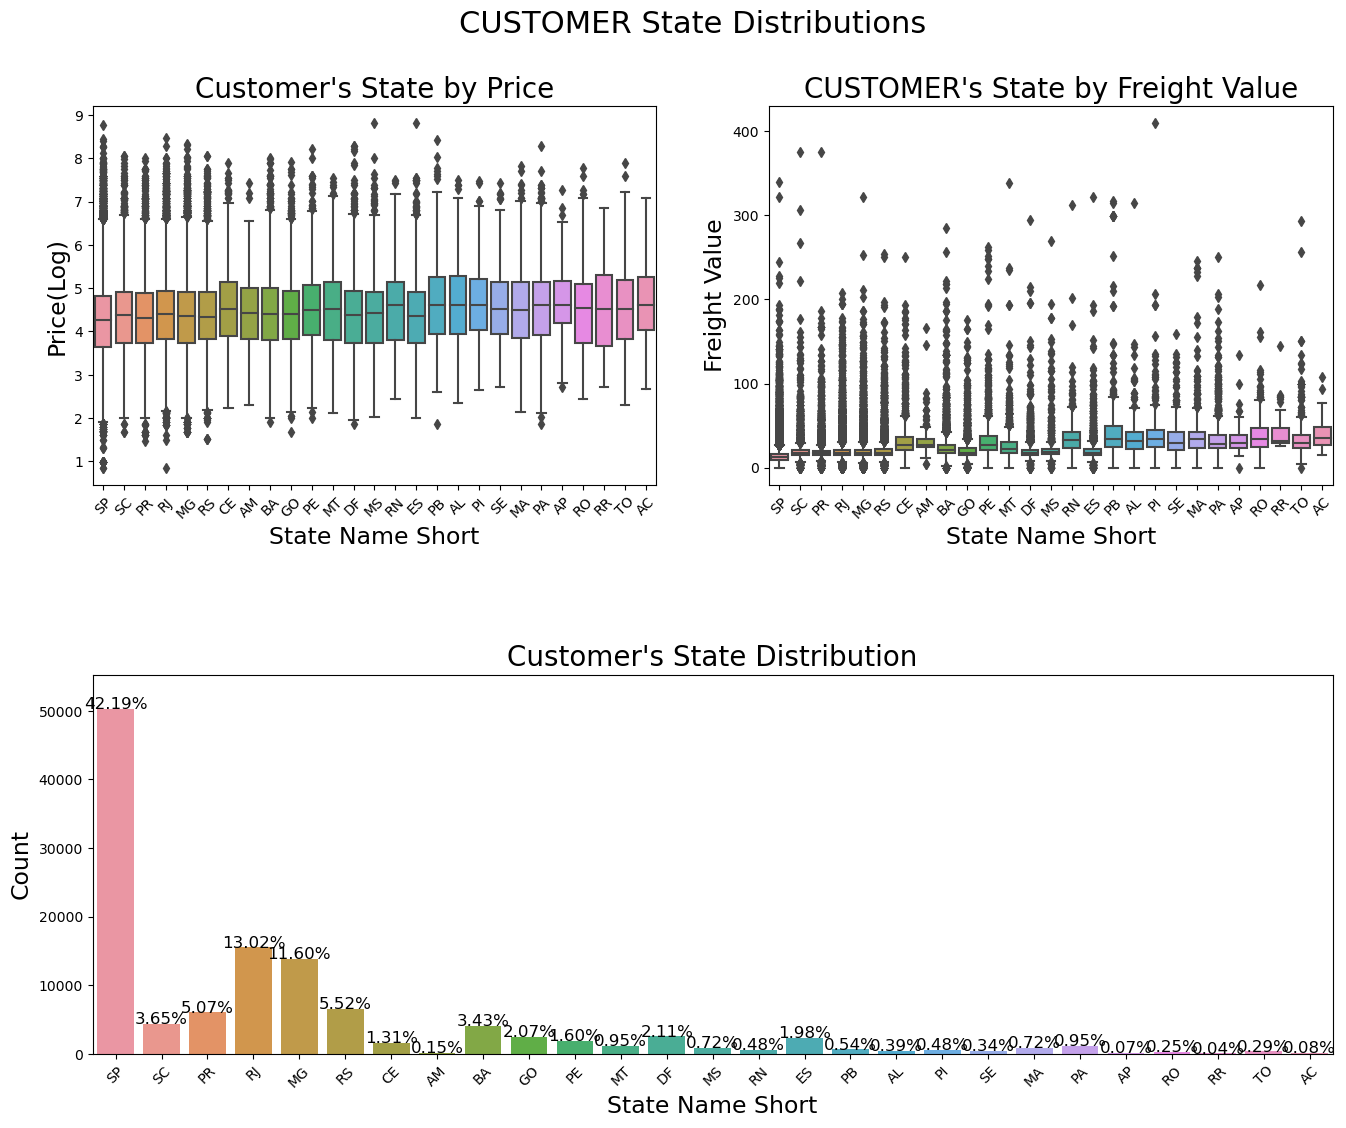

In [26]:
'''State features
I will explore the Customers and sellers states;
Also, the distribution of price and freight values between states;
Customer's
'''

plt.figure(figsize=(16,12))

plt.suptitle('CUSTOMER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='customer_state', data=df_train, orient='h')
g.set_title("Customer's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='customer_state', y='price_log', 
                 data=df_train[df_train['price'] != -1])
g2.set_title("Customer's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='customer_state', y='freight_value', 
                 data=df_train[df_train['price'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()


In [ ]:
'''
We can see that the most common state of CUSTOMERS is SP(42.19%), followed by RJ(13.02%) and MG(11.6%).
All this states is from the southeast region of Brazil. Also, we have many sales to RS, PR, 
SC (states from south region)

'''

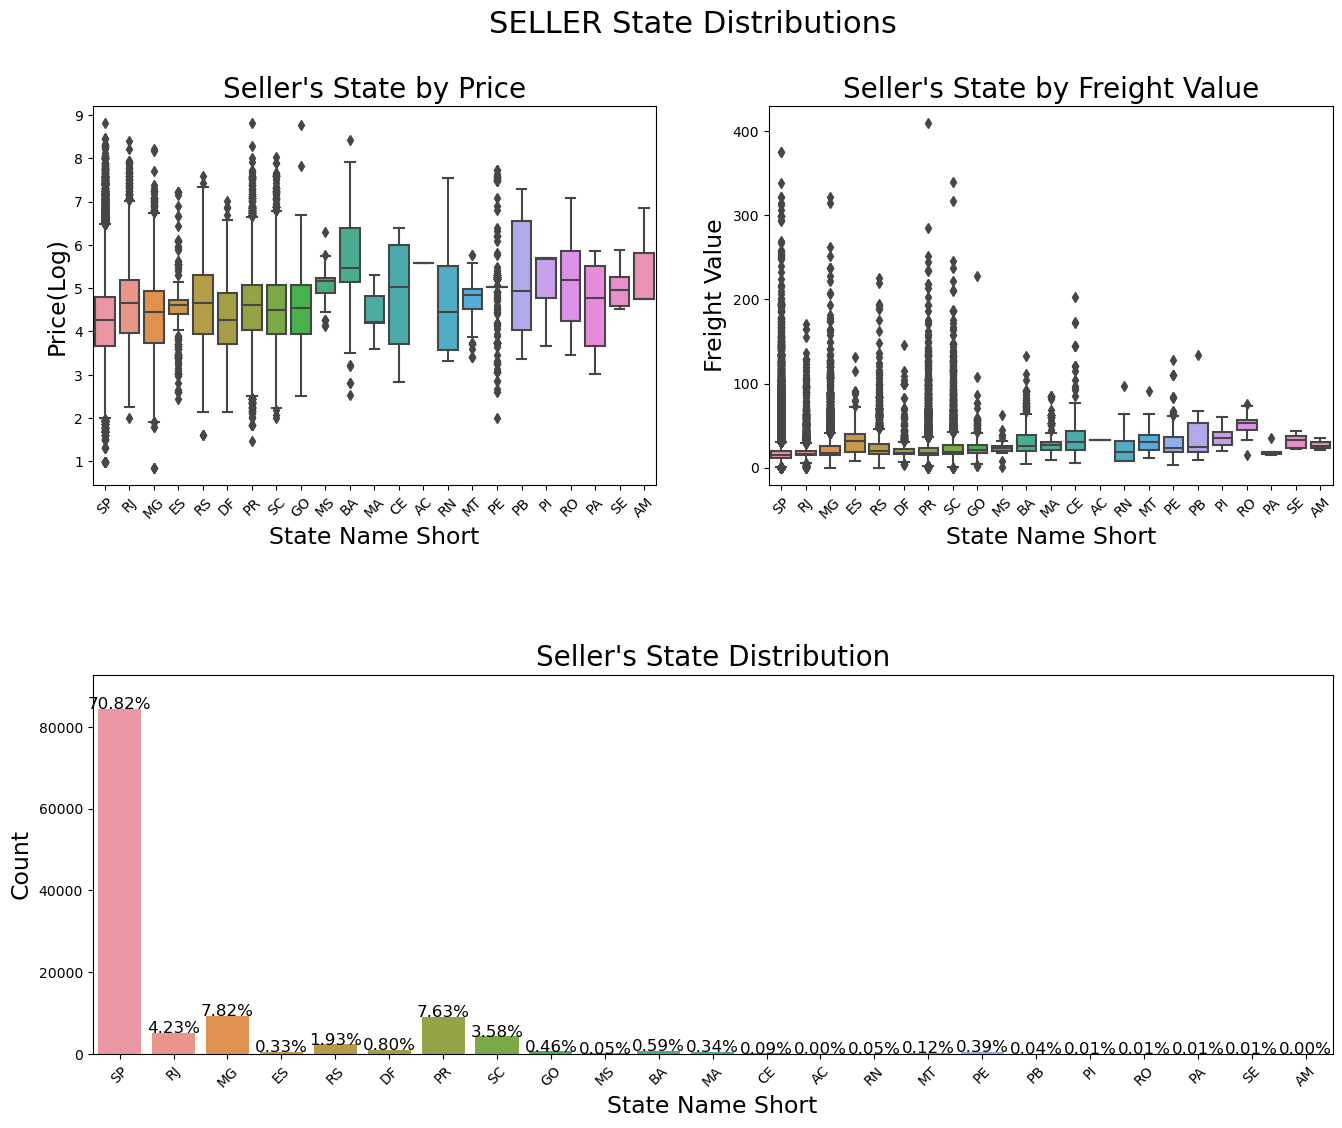

In [27]:
plt.figure(figsize=(16,12))

plt.suptitle('SELLER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='seller_state', data=df_train, orient='h')
g.set_title("Seller's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)
plt.subplot(221)
g2 = sns.boxplot(x='seller_state', y='price_log', 
                 data=df_train[df_train['price'] != -1])
g2.set_title("Seller's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='seller_state', y='freight_value', 
                 data=df_train[df_train['price'] != -1])
g3.set_title("Seller's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [ ]:
#Different of what we saw in Customer states, sellers have almost 70% 
#of sellers products solds from SP, followed by MG and PR.

In [30]:
# Seting regions
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

df_train.loc[df_train['customer_state'].isin(sudeste), 'cust_Region'] = 'Southeast'
df_train.loc[df_train['customer_state'].isin(nordeste), 'cust_Region'] = 'Northeast'
df_train.loc[df_train['customer_state'].isin(norte), 'cust_Region'] = 'North'
df_train.loc[df_train['customer_state'].isin(centro_oeste), 'cust_Region'] = 'Midwest'
df_train.loc[df_train['customer_state'].isin(sul), 'cust_Region'] = 'South'

In [31]:
# Freight Value mean from State to Regions
cross_heatmap(df_train[df_train['price'] != -1], ['seller_state', 'cust_Region'], 
              values=df_train[df_train['price'] != -1]['freight_value'], aggfunc='mean')

cust_Region,Midwest,North,Northeast,South,Southeast
seller_state,,,,,
AC,nan,nan,nan,nan,32.840000
AM,nan,nan,28.255000,nan,25.290000
BA,29.977381,46.290476,22.736355,39.643671,33.618110
CE,65.456667,85.614000,29.744054,51.445556,47.044130
DF,13.070164,58.371935,27.607364,27.096786,19.636728
ES,36.895833,68.896250,36.664464,39.894510,28.461445
GO,14.686705,26.595909,33.369841,30.535870,24.201088
MA,27.150192,28.859000,19.453333,42.660652,31.880362
MG,26.861624,41.899053,33.968349,28.904398,21.153626


In [32]:
# Order Item Id
df_train['ord_new'] = df_train['order_item_id'].copy()

df_train.loc[df_train['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'
df_train.loc[(df_train['order_item_id'] > 10), 'ord_new'] = '10 to 20'

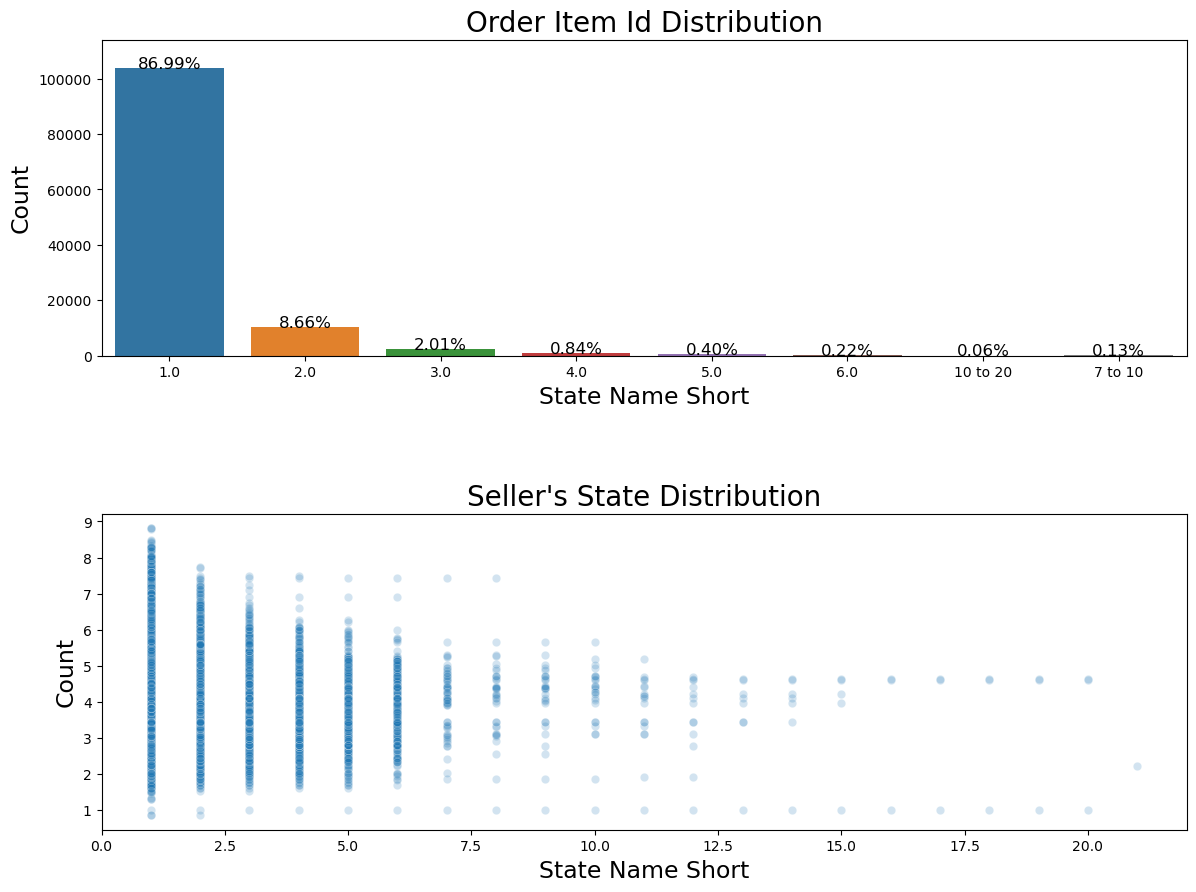

In [33]:
plt.figure(figsize=(14,10))


plt.subplot(211)
g = sns.countplot(x='ord_new', data=df_train)
g.set_title("Order Item Id Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)
plt.subplot(212)
g1 = sns.scatterplot(x='order_item_id', y='price_log',
                     data=df_train, alpha=.2)
g1.set_title("Seller's State Distribution", fontsize=20)
g1.set_xlabel("State Name Short", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

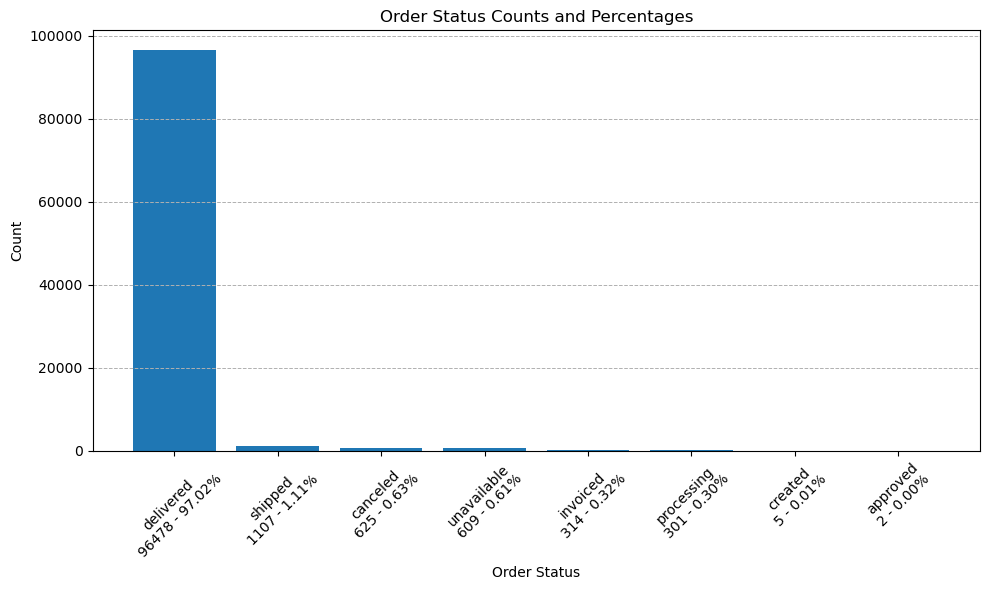

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the orders dataset
orders_dataset_path = 'olist_orders_dataset.csv'  # Replace with your file path
orders_df = pd.read_csv(orders_dataset_path)

# Count the number of orders for each status
order_status_counts = orders_df['order_status'].value_counts()
# Calculate the percentage of each order status
order_status_percentages = orders_df['order_status'].value_counts(normalize=True) * 100

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Combine counts and percentages
labels = [f'{status}\n{count} - {percent:.2f}%' for status, count, percent in zip(order_status_counts.index, order_status_counts.values, order_status_percentages.values)]

ax.bar(order_status_counts.index, order_status_counts.values, tick_label=labels)

# Adding grid lines
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Set the title and labels
ax.set_title('Order Status Counts and Percentages')
ax.set_xlabel('Order Status')
ax.set_ylabel('Count')

# Show the plot with the count and percentage
plt.xticks(rotation=45)
plt.tight_layout() # Adjust the plot to ensure everything fits without overlapping
plt.show()

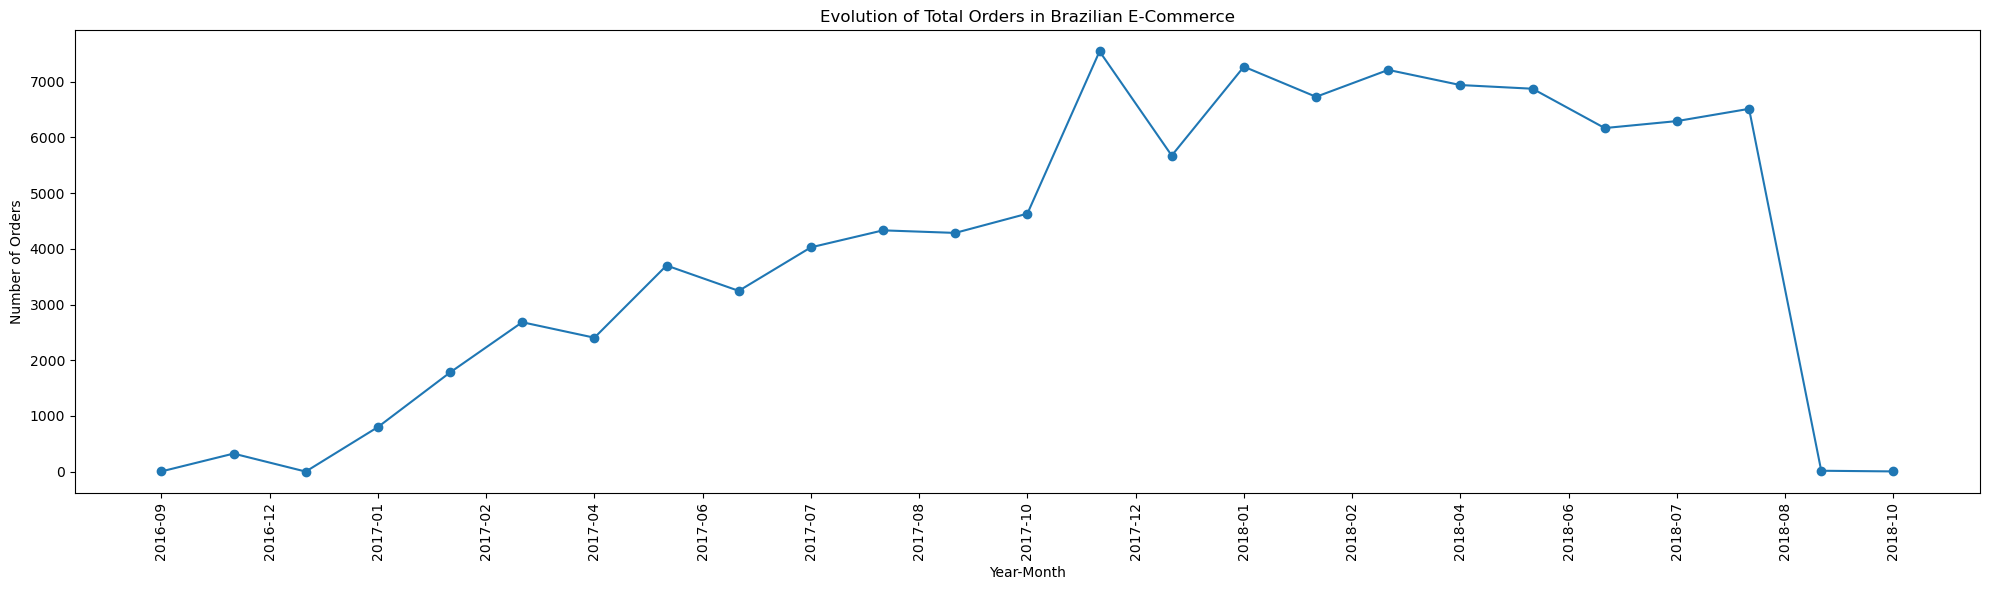

In [93]:
# Plot the data
plt.figure(figsize=(20, 6))
# Convert the index to string to avoid ConversionError
plt.plot(orders_per_month.index.astype('str'), orders_per_month.values, marker='o')


# Improve formatting
plt.title('Evolution of Total Orders in Brazilian E-Commerce')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Reduce the number of x-ticks

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

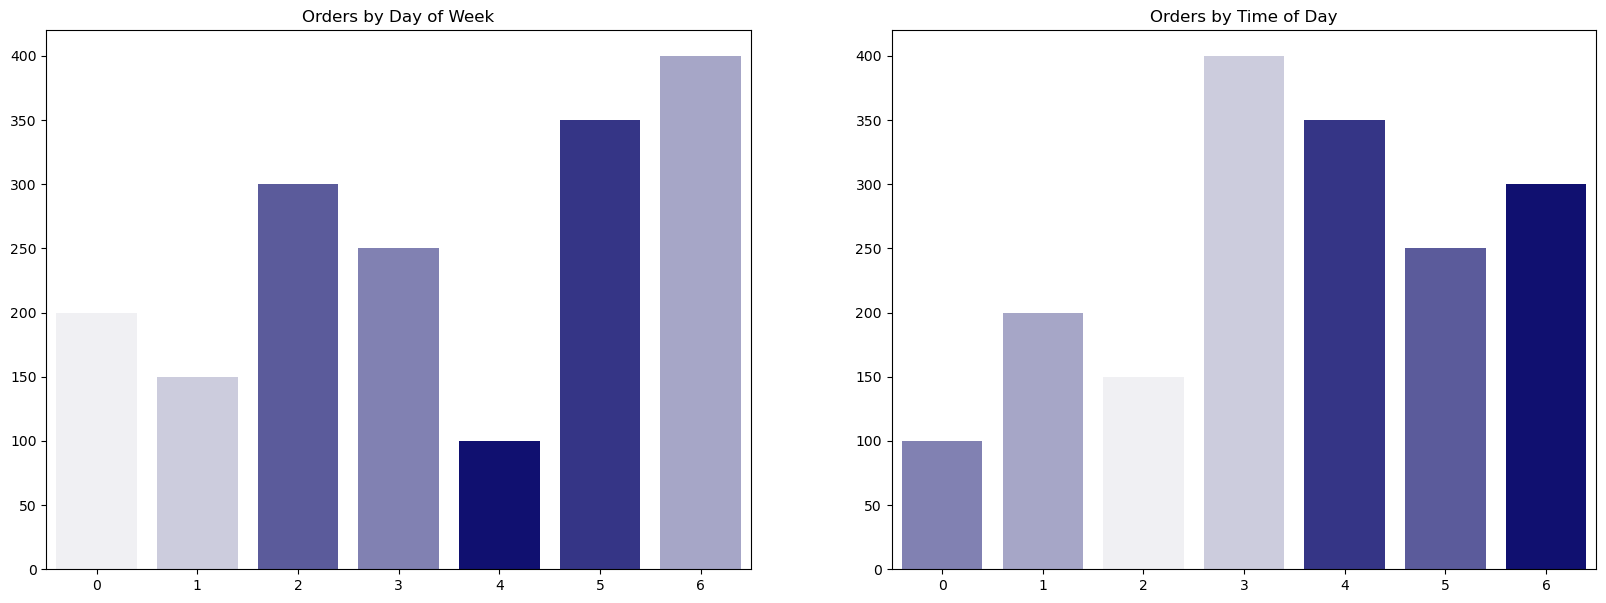

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have Series objects 'orders_by_dayofweek' and 'orders_by_timeofday'
# which contain the counts of orders by day of the week and by time of day, respectively.
# Replace these with your actual data.

# Define color palettes for the bars, with 'light' for the smallest value and 'dark' for the largest
num_colors_dayofweek = len(orders_by_dayofweek)
num_colors_timeofday = len(orders_by_timeofday)

# Create a linearly increasing palette of colors for the bars, light to dark
colors_dayofweek = sns.light_palette("navy", num_colors_dayofweek, reverse=True).as_hex()
colors_timeofday = sns.light_palette("navy", num_colors_timeofday, reverse=True).as_hex()

# Sort the colors based on the values, so highest values get the darkest color
colors_dayofweek_sorted = [colors_dayofweek[i] for i in orders_by_dayofweek.argsort()[::-1]]
colors_timeofday_sorted = [colors_timeofday[i] for i in orders_by_timeofday.argsort()[::-1]]

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plot for day of the week
sns.barplot(x=orders_by_dayofweek.index, y=orders_by_dayofweek.values, palette=colors_dayofweek_sorted, ax=ax[0])
ax[0].set_title('Orders by Day of Week')

# Plot for time of day
sns.barplot(x=orders_by_timeofday.index, y=orders_by_timeofday.values, palette=colors_timeofday_sorted, ax=ax[1])
ax[1].set_title('Orders by Time of Day')

plt.show()

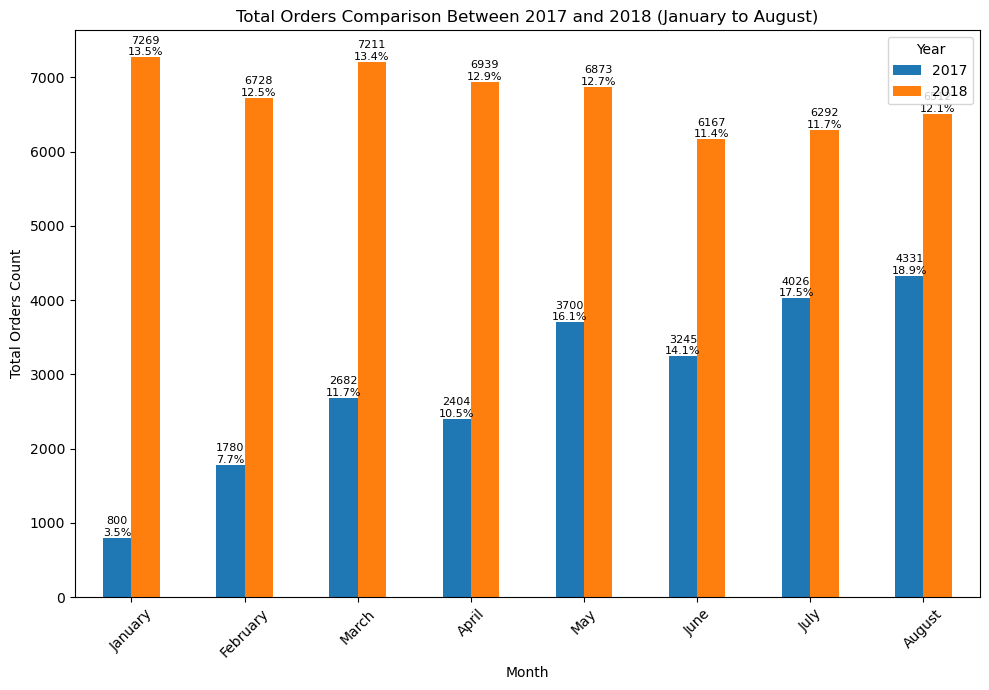

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'ax' is the Axes object returned by the 'plot' function
# and 'monthly_orders_pivot' is a DataFrame with your data.

# Plot the grouped bar chart again for clarity
ax = monthly_orders_pivot[[2017, 2018]].plot(kind='bar', figsize=(10, 7))

# Loop through each bar in the grouped bar chart
for i, bar in enumerate(ax.patches):
    # Get the position and dimensions of the bar
    x = bar.get_x()
    y = bar.get_height()
    width = bar.get_width()
    
    # The year and month for the current bar
    year = 2017 if i < len(ax.patches) / 2 else 2018
    month = monthly_orders_pivot.index[i % (len(ax.patches) // 2)]
    
    # The percentage value to display
    percentage = monthly_orders_pivot.loc[month, f'{year}_percentage']
    
    # Place the text on the bar
    ax.text(x + width/2, y, f'{y}\n{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

# Set title and labels
plt.title('Total Orders Comparison Between 2017 and 2018 (January to August)')
plt.xlabel('Month')
plt.ylabel('Total Orders Count')
plt.xticks(rotation=45)
plt.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()

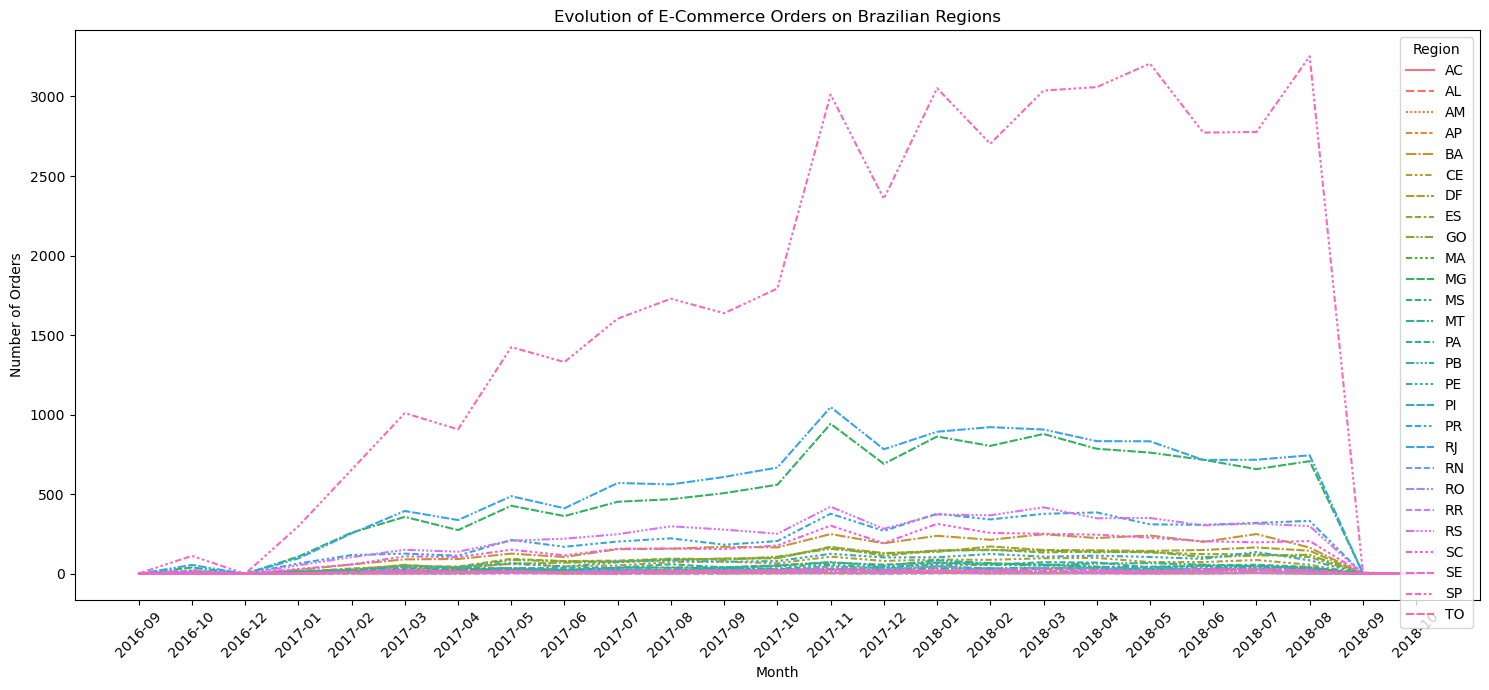

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv('olist_customers_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')

# Merge the orders dataframe with the customers dataframe to get the customer state
merged_df = pd.merge(orders_df, customers_df, on='customer_id')

# Convert order_purchase_timestamp to datetime and extract year and month
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['year_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# Aggregate data to count orders per region per month
orders_per_region_per_month = merged_df.groupby(['year_month', 'customer_state']) \
                                       .size() \
                                       .reset_index(name='order_count')

# Convert 'year_month' to string for plotting purposes
orders_per_region_per_month['year_month'] = orders_per_region_per_month['year_month'].astype(str)

# Re-creating the pivot table for the corrected 'year_month' data
orders_per_region_per_month_pivot = orders_per_region_per_month.pivot(index='year_month', 
                                                                      columns='customer_state', 
                                                                      values='order_count').fillna(0)

# Plotting the data
plt.figure(figsize=(15, 7))
sns.lineplot(data=orders_per_region_per_month_pivot)
plt.title('Evolution of E-Commerce Orders on Brazilian Regions')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [69]:
# We already have the orders_df loaded with the customer_id and order_purchase_timestamp.
# Now we need to load the order_payments_df to use it for the Monetary value calculation.
order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')

# We need to ensure that we're only considering completed orders, so we'll filter those with status 'delivered'.
orders_df_delivered = orders_df[orders_df['order_status'] == 'delivered']

# Calculate Recency as days from the most recent purchase in the dataset to the purchase date of each order.
# Convert order_purchase_timestamp to datetime format if not already
orders_df_delivered['order_purchase_timestamp'] = pd.to_datetime(orders_df_delivered['order_purchase_timestamp'])

# Find the most recent purchase in the dataset
most_recent_purchase = orders_df_delivered['order_purchase_timestamp'].max()

# Calculate Recency as days from the most recent purchase to each order's purchase date
orders_df_delivered['Recency'] = (most_recent_purchase - orders_df_delivered['order_purchase_timestamp']).dt.days

# Check the first few entries to verify the Recency calculation
orders_df_delivered[['customer_id', 'order_purchase_timestamp', 'Recency']].head()


# Calculate Frequency by counting unique order_ids for each customer.
frequency_df = orders_df_delivered.groupby('customer_id').size().reset_index(name='Frequency')

# Calculate Monetary value by summing the payment_value for each customer's orders.
monetary_df = order_payments_df.groupby('order_id')['payment_value'].sum().reset_index()
monetary_df = pd.merge(monetary_df, orders_df_delivered[['order_id', 'customer_id']], on='order_id')
monetary_df = monetary_df.groupby('customer_id')['payment_value'].sum().reset_index(name='Monetary')

# Merge the Recency and Frequency metrics with the Monetary metric for each customer.
rfm_df = pd.merge(orders_df_delivered[['customer_id', 'Recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# Since a customer might have more than one order, we need to make sure that we have the most recent order's recency.
rfm_df = rfm_df.groupby('customer_id').agg({'Recency': 'min', 'Frequency': 'max', 'Monetary': 'sum'}).reset_index()

# Display the first few rows of the RFM DataFrame.
rfm_df.head()

/var/folders/mn/vttw2j4j2ms2nsl9nv11043c0000gp/T/ipykernel_58857/3302275583.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mn/vttw2j4j2ms2nsl9nv11043c0000gp/T/ipykernel_58857/3302275583.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35
4,000379cdec625522490c315e70c7a9fb,149,1,107.01


In [73]:
def assign_rfm_segment(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Lose Them'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 9)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 3) and (df['RFM_Score'] < 5)):
        return 'Promising'
    else:
        return 'Require Activation'

# Apply the function to the DataFrame
rfm_df['Segment'] = rfm_df.apply(assign_rfm_segment, axis=1)

In [74]:
'''
With these metrics, the next step would be to segment customers into groups based on RFM scores. 
Typically, customers are divided into quartiles (or quintiles/tertiles depending on preference) 
for each RFM metric. Then, based on the combination of these three scores, we can classify customers 
into various segments like "Champions", "Loyal Customers", "Potential Loyalist", "New Customers", 
"At Risk", "Can’t Lose Them", etc.
'''
# Combine the RFM quartile scores to create a combined RFM score.
# The RFM score is calculated differently for Recency because a lower Recency value is better.
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# Calculate the RFM Score as the sum of the individual scores.
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(int) + rfm_df['F_Score'].astype(int) + rfm_df['M_Score'].astype(int)

# Define the RFM segments based on the RFM score.
rfm_df['Segment'] = rfm_df.apply(assign_rfm_segment, axis=1)

# Check the first few entries of the dataframe to verify the RFM_Score and Segment columns.
rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Segment']].head()


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2,1,3,6,Potential
1,000161a058600d5901f007fab4c27140,409,1,67.41,1,1,2,4,Promising
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,4,6,Potential
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,4,6,Potential
4,000379cdec625522490c315e70c7a9fb,149,1,107.01,3,1,3,7,Loyal


In [75]:
rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2,1,3,6,Potential
1,000161a058600d5901f007fab4c27140,409,1,67.41,1,1,2,4,Promising
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,4,6,Potential
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,4,6,Potential
4,000379cdec625522490c315e70c7a9fb,149,1,107.01,3,1,3,7,Loyal
...,...,...,...,...,...,...,...,...,...
96472,fffcb937e9dd47a13f05ecb8290f4d3e,165,1,91.91,3,4,2,9,Can't Lose Them
96473,fffecc9f79fd8c764f843e9951b11341,152,1,81.36,3,4,2,9,Can't Lose Them
96474,fffeda5b6d849fbd39689bb92087f431,99,1,63.13,4,4,2,10,Can't Lose Them
96475,ffff42319e9b2d713724ae527742af25,76,1,214.13,4,4,4,12,Can't Lose Them


In [80]:
df_macroecon = pd.read_csv("brazil_macro.csv")

In [85]:
df_ans = pd.merge(df_train, df_macroecon, left_on='customer_state', right_on='state_abbr',how='left')

In [86]:
df_ans = pd.merge(df_ans, rfm_df, left_on='customer_id', right_on='customer_id', how='left')

In [91]:
df_ans.to_csv("df_ans.csv")